In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("Onion_2019.csv")
data.shape
data.isnull().sum()

state           0
district        0
market          0
commodity       0
variety         0
arrival_date    0
min_price       0
max_price       0
modal_price     0
dtype: int64

In [14]:
data.head()

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,7/6/2019,6000,10000,8000.0
1,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,11/6/2019,6000,10000,8000.0
2,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,12/6/2019,6000,10000,8000.0
3,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,13/06/2019,6000,10000,8000.0
4,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,14/06/2019,4000,8000,6000.0


In [15]:
# data.drop(columns=['district'],inplace=True)
# # ## remove gb and kg from Ram and weight and convert the cols to numeric
# # data['Ram'] = data['Ram'].str.replace("GB", "")
# # data['Weight'] = data['Weight'].str.replace("kg", "")
# # data['Ram'] = data['Ram'].astype('int32')
# # data['Weight'] = data['Weight'].astype('float32')

C:\Users\Ali\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


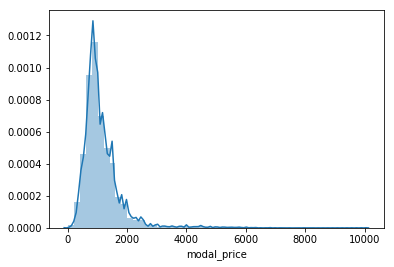

In [16]:
sns.distplot(data['modal_price'])
plt.show()

# Seprate the date month and year

In [20]:
data[["day", "month", "year"]] = data["arrival_date"].str.split("/", expand = True)
print("\nNew DataFrame:")
print(data)


New DataFrame:
                      state                   district  \
0       Andaman and Nicobar                    Nicobar   
1       Andaman and Nicobar                    Nicobar   
2       Andaman and Nicobar                    Nicobar   
3       Andaman and Nicobar                    Nicobar   
4       Andaman and Nicobar                    Nicobar   
5       Andaman and Nicobar                    Nicobar   
6       Andaman and Nicobar                    Nicobar   
7       Andaman and Nicobar  North and Middle Andaman    
8       Andaman and Nicobar              South Andaman   
9       Andaman and Nicobar              South Andaman   
10      Andaman and Nicobar              South Andaman   
11      Andaman and Nicobar              South Andaman   
12      Andaman and Nicobar              South Andaman   
13      Andaman and Nicobar              South Andaman   
14      Andaman and Nicobar              South Andaman   
15      Andaman and Nicobar              South Andaman  

C:\Users\Ali\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


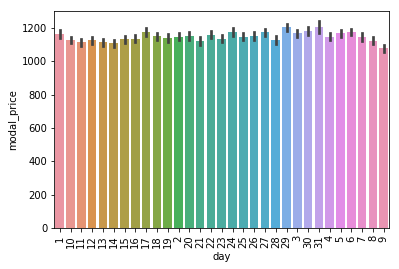

In [22]:
sns.barplot(x=data['day'], y=data['modal_price'])

plt.xticks(rotation="vertical")

plt.show()

C:\Users\Ali\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


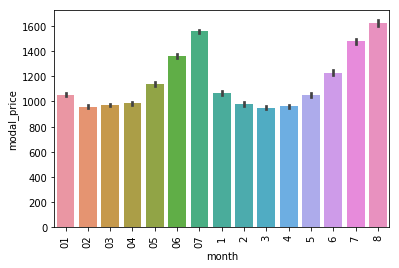

In [23]:
sns.barplot(x=data['month'], y=data['modal_price'])

plt.xticks(rotation="vertical")

plt.show()

C:\Users\Ali\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


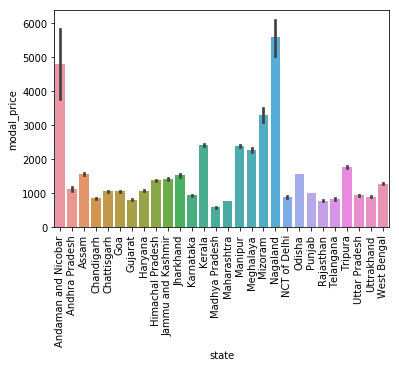

In [18]:
sns.barplot(x=data['state'], y=data['modal_price'])

plt.xticks(rotation="vertical")

plt.show()

C:\Users\Ali\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


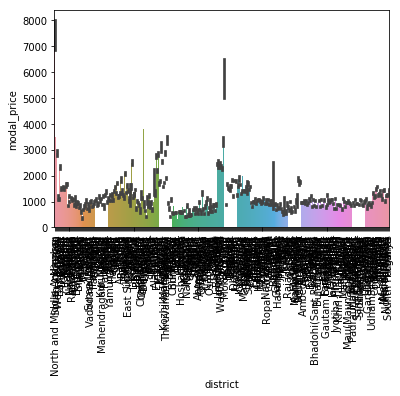

In [17]:
sns.barplot(x=data['district'], y=data['modal_price'])

plt.xticks(rotation="vertical")

plt.show()

***the price vary with district and date,month*** 

# Log-Normal Transformation
we saw the distribution of the target variable above which was right-skewed. By transforming it to normal distribution performance of the algorithm will increase. we take the log of values that transform to the normal distribution which you can observe below. So while separating dependent and independent variables we will take a log of price, and in displaying the result perform exponent of it.

C:\Users\Ali\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


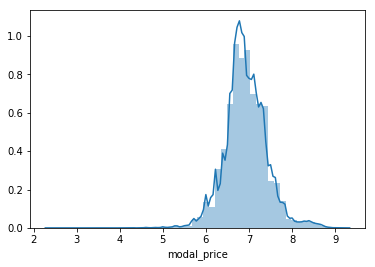

In [25]:
sns.distplot(np.log(data['modal_price']))
plt.show()

# Machine Learning Modeling for Vegitable Prediction

In [31]:
#import Libraries
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor


ModuleNotFoundError: No module named 'sklearn.compose'